Credit Card Applications Approval

**Subject**: Artificial intelligence (AI)

**Lecturer**:  Mr.  Rina  Buoy

**Team Members**:

*   Ry Run
*   Sek  Samnang
* Sopha  Rothmony
* Khy  Vichka

## Table of contents

1. [Introduction](#Introduction)
 
2. [Required libraries](#Required-libraries)

4. [Problem Statement](#Required-libraries)

5. [Ojbectives](#Ojbectives)

6. [Checking the data](#Checking-the-data)

7. [Handling the missing values (part i)](#Handling-the-missing-values-(part-i))

8. [Handling the missing values (part ii)](#Handling-the-missing-values-(part-i))

9. [Exploratory Data Analysis(EDA)](#Exploratory-Data-Analysis(EDA))

10. [Splitting the dataset into train and test sets](#Splitting-the-dataset)

11. [Preprocessing the data](#Preprocessing-the-data)

12. [Data Modeling and Evaluation](#Data-Modeling-and-Evaluation)

    - [Logistic Regession](#Logistic-Regession)

    - [Random Forest](#Forest](#Parameter-tuning))


12. [Conclusions](#Conclusions)


13. [Acknowledgements](#Acknowledgements)

##Introduction
**Commercial** banks receive a lot of  applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual’s credit report. 

**The decision** of approving a credit card is majorly
dependent on the personal and financial background of  the applicant. Factors like, age, gender, income, employment status, credit history and other attributes all carry weight in the approval decision




##Required libraries
The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library. 

##Problem Statement
Banking industries received so many applications for credit card request. Going through each request manually can be very time consuming, also prone to human errors.


A credit card application might be denied 



*   A Mistake on the application 
*   A error on your credit report 
*   Insufficient income
*   Shaky credit history 
*   Too many credit application at on time








##Ojbectives
This task can be automated with the power of machine learning
and pretty much every commercial bank does so nowadays. 
In this project, you will build an automatic credit card approval 
predictor using machine learning techniques

By analysing the data, we will build a predictor 
model by using some well-known pre-processing methods
such as 


*   imputing missing values
*   label encoding
*   scaling the columns values
*   modeling and evaduation





##Checking the data

**Import Libraries**

In [1]:
# Import pandas
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from scipy import stats as ss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

**Load dataset**

In [2]:
cc_apps = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data",header=None,delimiter = ',')
# Inspect data
cc_apps.columns= ['Male','Age','Debt',	'Married',	
                  'BankCustomer',	'EducationLevel',	'Ethnicity',	'YearsEmployed',	'PriorDefault',	'Employed',
                  'CreditScore',	'DriversLicense',	'Citizen',	'ZipCode',	'Income',	'Approved']

CC_data2 = cc_apps
cc_apps

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [3]:
# Print Descriptive statistics
cc_apps.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [4]:
# Print DataFrame information 
cc_apps.tail(17)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


##Handling the missing values (part i)
<p>We've uncovered some issues that will affect the performance of our machine learning model(s) if they go unchanged:</p>
<ul>
<li>Our dataset contains both numeric and non-numeric data (specifically data that are of <code>float64</code>, <code>int64</code> and <code>object</code> types). Specifically, the features 2, 7, 10 and 14 contain numeric values (of types float64, float64, int64 and int64 respectively) and all the other features contain non-numeric values.</li>
<li>The dataset also contains values from several ranges. Some features have a value range of 0 - 28, some have a range of 2 - 67, and some have a range of 1017 - 100000. Apart from these, we can get useful statistical information (like <code>mean</code>, <code>max</code>, and <code>min</code>) about the features that have numerical values. </li>
<li>Finally, the dataset has missing values, which we'll take care of in this task. The missing values in the dataset are labeled with '?', which can be seen in the last cell's output.</li>
</ul>
<p>Now, let's temporarily replace these missing value question marks with NaN.</p>

In [5]:
# Replace the '?'s with Na
cc_apps=cc_apps.replace('?',np.NaN)
# Inspect the missing values again
cc_apps.tail(17)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


##Handling the missing values (part ii)
<p>We replaced all the question marks with NaNs. This is going to help us in the next missing value treatment that we are going to perform.</p>
<p>An important question that gets raised here is <em>why are we giving so much importance to missing values</em>? Can't they be just ignored? Ignoring missing values can affect the performance of a machine learning model heavily. While ignoring the missing values our machine learning model may miss out on information about the dataset that may be useful for its training. Then, there are many models which cannot handle missing values implicitly such as LDA. </p>
<p>So, to avoid this problem, we are going to impute the missing values with a strategy called mean imputation.</p>

In [6]:
# Impute the missing values with mean imputation
cc_apps.fillna(cc_apps.mean(), inplace=True)

# Count the number of NaNs in the dataset to verify 
print(cc_apps.isnull().values.sum())

67


C:\Users\user\AppData\Local\Temp\ipykernel_11436\9984385.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cc_apps.fillna(cc_apps.mean(), inplace=True)


##Handling the missing values (part iii)
<p>We have successfully taken care of the missing values present in the numeric columns. There are still some missing values to be imputed for columns 0, 1, 3, 4, 5, 6 and 13. All of these columns contain non-numeric data and this why the mean imputation strategy would not work here. This needs a different treatment. </p>
<p>We are going to impute these missing values with the most frequent values as present in the respective columns.

In [7]:
# Iterate over each column of cc_apps
for col in cc_apps.columns:
    # Check if the column is of object type
    if cc_apps[col].dtypes == 'object': 
        cc_apps[col] = cc_apps[col].fillna(cc_apps[col].mode().iloc[0])

# Count the number of NaNs in the dataset and print the counts to verify.
print(cc_apps.isnull().values.sum())

0


In [8]:
#verify null value
cc_apps.tail(17)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
673,b,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


##8. Exploratory Data Analysis(EDA)

To start with, the distribution of 5 continuous variables Age, Debt, Credit Score, Income and Years employed was observed to get a sense of the nature of the dataset.



C:\Users\user\AppData\Local\Temp\ipykernel_11436\2296036260.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col)


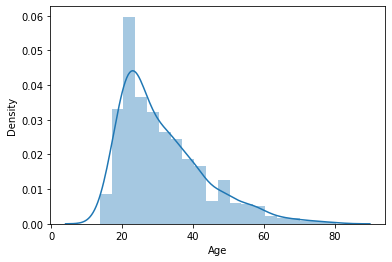

C:\Users\user\AppData\Local\Temp\ipykernel_11436\2296036260.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col)


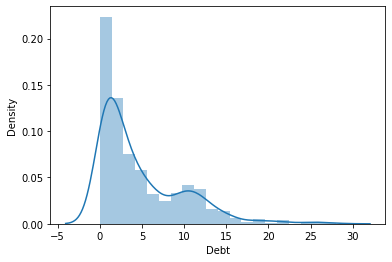

C:\Users\user\AppData\Local\Temp\ipykernel_11436\2296036260.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col)


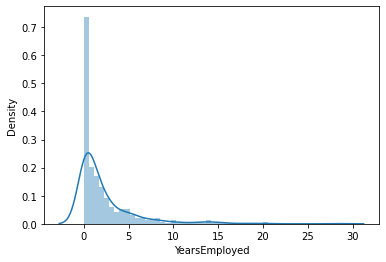

C:\Users\user\AppData\Local\Temp\ipykernel_11436\2296036260.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col)


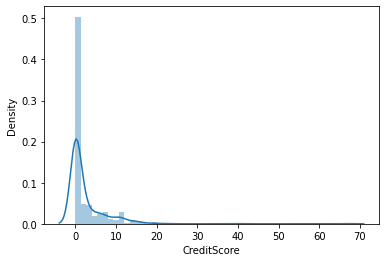

C:\Users\user\AppData\Local\Temp\ipykernel_11436\2296036260.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col)


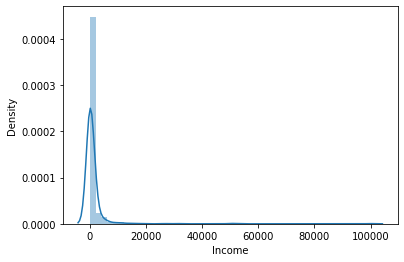

In [9]:
def plotDistPlot(col):
    sns.distplot(col)
    plt.show()
    
plotDistPlot(cc_apps['Age'])
plotDistPlot(cc_apps['Debt'])
plotDistPlot(cc_apps['YearsEmployed'])
plotDistPlot(cc_apps['CreditScore'])
plotDistPlot(cc_apps['Income'])

These initial plots showed that all variables have distributions that are skewed to the right, indicating that the data is not well-distributed about the mean. In order to reduce the skew,log transformations were applied and then plotted again.



**Plotting the Correlation Matrix**

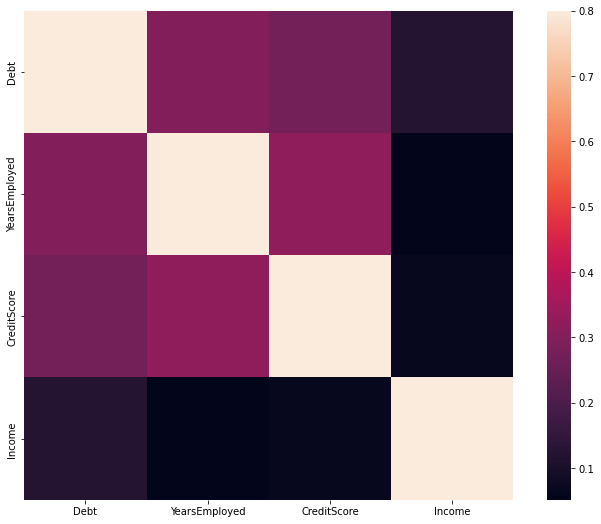

In [10]:
#correlation matrix
corrmat = cc_apps.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

The correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction.



c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


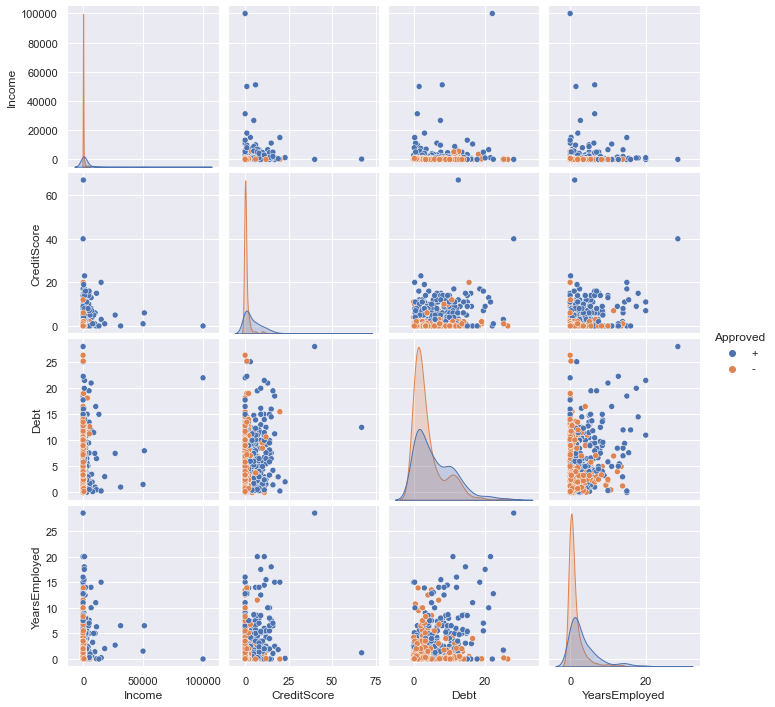

In [11]:
sns.set()
cols = ['Age', 'Income', 'CreditScore', 'Debt', 'YearsEmployed','Approved']
sns.pairplot(cc_apps[cols],hue='Approved', size = 2.5)
plt.show();

In [12]:
def corr_plot(x, y, data, xlab, ylab, hue='Approved'):
    ax = sns.relplot(x=x, y=y, hue=hue, data=data);
    ax.set(xlabel=xlab, ylabel=ylab)
    for t, l in zip(ax._legend.texts, ['Accepted', 'Declined']): 
        t.set_text(l)
    ax.add_legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

    return ax



**Is there any relation between debt level and credit score?**

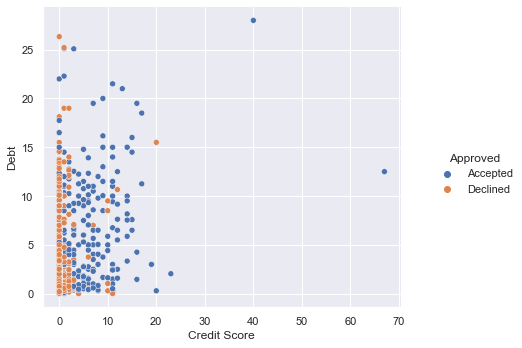

In [13]:
 ax = corr_plot('CreditScore', 'Debt', data = cc_apps, xlab = 'Credit Score', ylab = 'Debt') 

We can discern that there is no clear correlation between the credit score of an individual and the debt associated with them. Though it seems like individual with lower credit scores had their applications declined, still the applications were approved for people with higher debt and higher credit score was approved. Hence, the business must set some factor of debt to credit score for making sure that in case of major national or global financial adversity or the adversity faced by individual's own financial decisions, they are still able to maintain payments of their bill to considerable extent.



**Is there a correlation between the Income earned by an individual and the credit score they posses?**

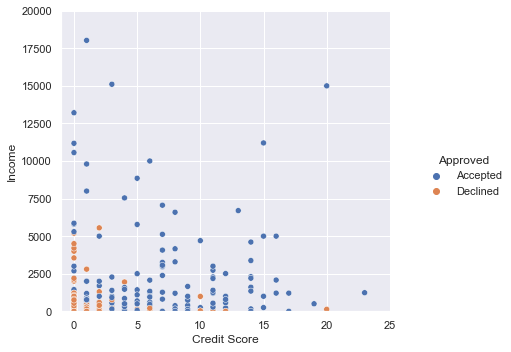

In [14]:
import matplotlib as plt
ax = corr_plot('CreditScore', 'Income', data = cc_apps, xlab = 'Credit Score', ylab = 'Income')
plt.pyplot.xlim(-1,25)
plt.pyplot.ylim(-1,20000)
plt.pyplot.show()

Its confirmed ! The individuals having higher Income and higher credit score get their applications approved. Whereas, the ones who do not have good Income and good credit score lie on the bottom left corner of our chart in orange which means that they are the ones who were declined.

The other insight that is easily discernible from above is the people good credit history and lower income do get their applications approved. Hence, this bolsters our assumption or generic fact in market that the people with good credit history get credit cards easily. Thus, credit score is dominating variable it seems in determing the dependent variable.



**Percentage of Credit Cards Approval**

In [15]:
cc_apps['Approved'].value_counts().sort_index()

+    307
-    383
Name: Approved, dtype: int64

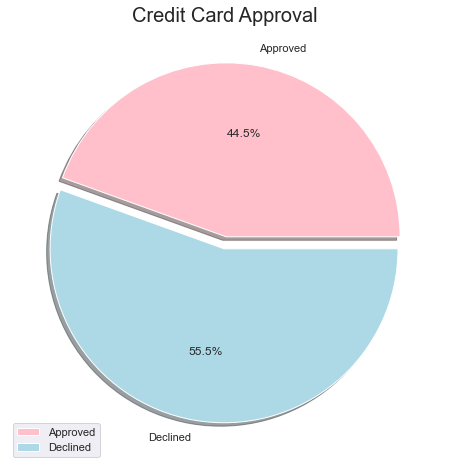

In [16]:
import matplotlib.pyplot as plt
labels = ['Approved', 'Declined']
colors = ['pink', 'lightblue']
size = [307, 383]
explode = [0.05, 0.02]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.1f%%")
plt.title('Credit Card Approval', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

On looking at the target field, it seems a fair balance data. This means we will have enough observation to train our model for both the classes in order to predict correctly. I indicated approval and 0 indicated rejections.


## 6. Preprocessing the data (part i)
<p>The missing values are now successfully handled.</p>
<p>There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into three main tasks:</p>
<ol>
<li>Convert the non-numeric data into numeric.</li>
<li>Split the data into train and test sets. </li>
<li>Scale the feature values to a uniform range.</li>
</ol>
<p>First, we will be converting all the non-numeric values into numeric ones. We do this because not only it results in a faster computation but also many machine learning models (and especially the ones developed using scikit-learn) require the data to be in a strictly numeric format.  

In [17]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in cc_apps.columns:
    # Compare if the dtype is object
    if cc_apps[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        cc_apps[col]=le.fit_transform(cc_apps[col])
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            690 non-null    int32  
 1   Age             690 non-null    int32  
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int32  
 4   BankCustomer    690 non-null    int32  
 5   EducationLevel  690 non-null    int32  
 6   Ethnicity       690 non-null    int32  
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int32  
 9   Employed        690 non-null    int32  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int32  
 12  Citizen         690 non-null    int32  
 13  ZipCode         690 non-null    int32  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int32  
dtypes: float64(2), int32(12), int64(2)
memory usage: 54.0 KB


## Splitting the dataset into train and test sets
<p>We have successfully converted all the non-numeric values to numeric ones.</p>
<p>Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to scale the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then apply the scaling.</p>
<p>Also, features like <code>DriversLicense</code> and <code>ZipCode</code> are not as important as the other features in the dataset for predicting credit card approvals. We should drop them to design our machine learning model with the best set of features. In Data Science literature, this is often referred to as <em>feature selection</em>. </p>

In [18]:
# Import train_test_split
from sklearn.model_selection import train_test_split
# Drop the features 11 and 13 and convert the DataFrame to a NumPy array
cc_apps = cc_apps.drop(['DriversLicense', 'ZipCode'], axis=1)
cc_apps = cc_apps.values

# Segregate features and labels into separate variables
X,y = cc_apps[:,0:13] , cc_apps[:,13]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.20,
                                random_state=42)


## 8. Preprocessing the data (part ii)
<p>The data is now split into two separate sets - train and test sets respectively. We are only left with one final preprocessing step of scaling before we can fit a machine learning model to the data. </p>
<p>Now, let's try to understand what these scaled values mean in the real world. Let's use <code>CreditScore</code> as an example. The credit score of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a <code>CreditScore</code> of 1 is the highest since we're rescaling all the values to the range of 0-1.</p>

In [19]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

##Data Modeling and Evaluation
### Logistic Regression

In [20]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()
# Fit logreg to the train set
logreg.fit(rescaledX_train,y_train)

LogisticRegression()

In [21]:
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

Accuracy of logistic regression classifier:  0.8260869565217391


###Grid searching and making the model perform better

In [22]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Define the grid of values for tol and max_iter
tol = [0.01,0.001,0.0001]
max_iter = [100,150,200]
# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

### Finding the best performing model

In [23]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_

# Creating a dictionary to save the best results
best_models = {'Logistic': best_score}


print(f'Best Score: {best_score}, using {best_params}')

Best Score: 0.8507246376811594, using {'max_iter': 100, 'tol': 0.01}


## Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators=500)
rf.fit(rescaledX_train, y_train)
y_pred = rf.predict(rescaledX_test)
print("Random Forest classifier has accuracy of: ", rf.score(rescaledX_test, y_test)) 

Random Forest classifier has accuracy of:  0.8768115942028986


Random Forest Classifier, we can find the most important features

Feature ranking:
1. feature 8 (0.305176)
2. feature 7 (0.110147)
3. feature 10 (0.103091)
4. feature 12 (0.102604)
5. feature 2 (0.096226)
6. feature 1 (0.085138)
7. feature 5 (0.059498)
8. feature 9 (0.056606)
9. feature 6 (0.028281)
10. feature 0 (0.014771)
11. feature 3 (0.013912)
12. feature 11 (0.012393)
13. feature 4 (0.012158)


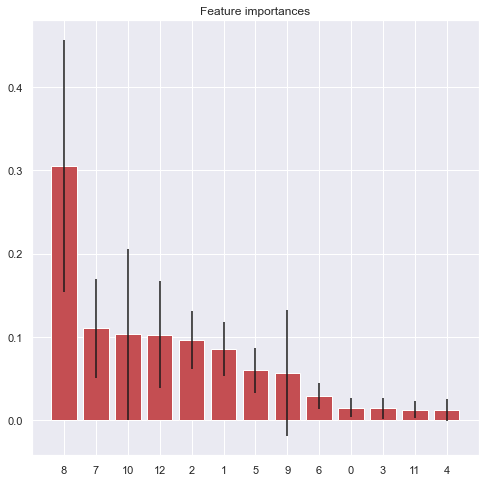

In [25]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

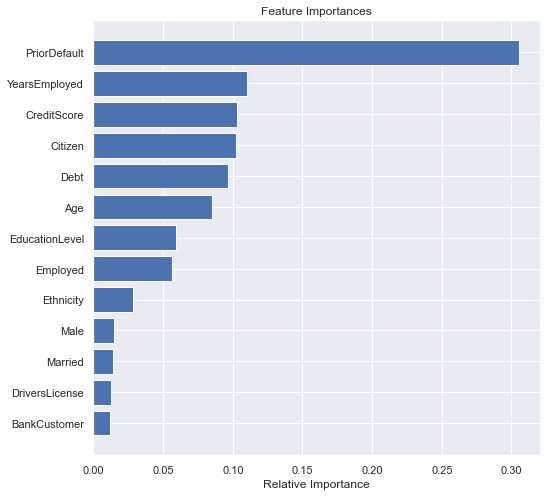

In [26]:
# copy of CC_data is in CC_data2
CC_data2 = CC_data2.drop(['Approved'], axis=1)

features = CC_data2.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

This graph indicates the feature importance for the given data set in making the decision of credit card request should get approved or not. Prior default is coming as one of the most important features, followed by credit score, years of employment, debt, income, and age. Bottom 4 are not at all playing any significant role.

##Conclusions
From this initial analysis, we are able to conclude  that the most significant factors in determining the outcome of a credit application are Employment, Income, Credit Score and Prior Default.

Based on these insights, we can work on building some predictive models. They can be used by analysts in financial sector and be incorporated to automate the credit approval process. These results can also serve as a source of information for the consumers.

Modern credit analyses employ many additional variables like the criminal records of applicants, their health information, net balance between monthly income and expenses. A dataset with these variables could be acquired. It’s also possible to add complementary variables to the dataset. This will make the credit simulations more  , similar to what is done by the banks before a credit is approved

Furthermore, On  applying  the  **Random  Forest  Model**,  we  have  achieved  the  accuracy  of  **86%**  which  is  significantly  highest


## Acknowledgements

Many thanks to [Ashish Tripathi](https://medium.com/@ashish.tripathi1207/credit-card-approval-prediction-model-in-python-c0e07677058e/) that provide  articles of credit card approval in medium and many articles from kaggles:

*   https://www.kaggle.com/noureddineizmar/predicting-credit-card-approvals,

*   https://www.kaggle.com/mmmarchetti/tutorial-predicting-credit-card-aprovals
*  https://www.kaggle.com/rikdifos/credit-card-approval-prediction-using-ml



